# Project description


You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

# Project stages

  1. Open the data file and study the general information
  2. Prepare the data
  3. Analyze the data
  4. Test the hypotheses
  5. Write an overall conclusion

# Description of the Data

##### The users table (data on users):
- user_id — unique user identifier
- first_name — user's name
- last_name — user's last name
- age — user's age (years)
- reg_date — subscription date (dd, mm, yy)
- churn_date — the date the user stopped using the service (if the value is missing, the calling plan was being used when this     data was retrieved)
- city — user's city of residence
- plan — calling plan name
##### The calls table (data on calls):
- id — unique call identifier
- call_date — call date
- duration — call duration (in minutes)
- user_id — the identifier of the user making the call
##### The messages table (data on texts):
- id — unique text message identifier
- message_date — text message date
- user_id — the identifier of the user sending the text
##### The internet table (data on web sessions):
- id — unique session identifier
- mb_used — the volume of data spent during the session (in megabytes)
- session_date — web session date
- user_id — user identifier
##### The plans table (data on the plans):
- plan_name — calling plan name
- usd_monthly_fee — monthly charge in US dollars
- minutes_included — monthly minute allowance
- messages_included — monthly text allowance
- mb_per_month_included — data volume allowance (in megabytes)
- usd_per_minute — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st       minute will be charged)
- usd_per_message — price per text after exceeding the package limits
- usd_per_gb — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

# Step 1. Open the data file and study the general information

In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
try:
    data_calls = pd.read_csv('/Users/yoheved/Desktop/Study/megaline_calls.csv')
except:
    data_calls = pd.read_csv('/datasets/megaline_calls.csv')
    

In [3]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
data_calls.sample(15)

,id,user_id,call_date,duration
5607,1027_150,1027,2018-12-02,14.02
87369,1320_1038,1320,2018-05-20,3.67
92883,1334_251,1334,2018-07-09,4.75
16673,1065_41,1065,2018-12-03,0.00
22544,1082_615,1082,2018-04-29,0.00
42901,1156_506,1156,2018-12-20,0.00
132990,1479_622,1479,2018-12-10,0.00
32894,1123_252,1123,2018-10-23,0.00
118650,1412_934,1412,2018-08-17,13.11
11386,1050_157,1050,2018-05-25,6.10


This dataset consists of 4 columns and 137735 rows. Data types are: object (2 columns), float64 (1 column) and int64 (1 column). From the first look I see that there are no missing values there, but also I see calls duration of 0 min, which could be missing calls, also it would be good to convert call_date to the datetime type in order to reduce memory using. One more strange thing I noticed is a duration of calls. Since duration in minutes it is weird to see such values as 5.98 and 6.68, I think need to round those values to minutes properly.

In [5]:
try:
    data_int = pd.read_csv('/Users/yoheved/Desktop/Study/megaline_internet.csv')
except:
    data_int = pd.read_csv('/datasets/megaline_internet.csv')

In [6]:
data_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [7]:
data_int.sample(10)

,id,user_id,session_date,mb_used
25737,1120_283,1120,2018-11-26,303.84
95923,1447_113,1447,2018-11-12,0.00
104554,1498_640,1498,2018-11-21,619.34
50588,1226_69,1226,2018-11-29,51.17
17597,1079_202,1079,2018-11-11,605.03
18845,1084_107,1084,2018-12-30,824.20
87144,1404_11,1404,2018-12-09,1231.60
103229,1494_111,1494,2018-11-05,726.64
31512,1144_237,1144,2018-05-31,129.99
23653,1109_231,1109,2018-07-22,416.03


This dataset also consists of 4 columns and 104825 rows. The data types are: float64 (1 column), int64 (1 column) and object (2 columns). There are no missing values but again I see 0 values for traffic used. Maybe those clients don't use mobile internet because of religion or any other reasons.And again I think that need convert session_date column to the datetime type of data for reducing usage of memory.

In [8]:
try:
    data_mes = pd.read_csv('/Users/yoheved/Desktop/Study/megaline_messages.csv')
except:
    data_mes = pd.read_csv('/datasets/megaline_messages.csv')

In [9]:
data_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [10]:
data_mes.sample(10)

,id,user_id,message_date
17005,1113_64,1113,2018-11-10
69689,1454_51,1454,2018-07-29
64027,1408_152,1408,2018-03-16
167,1001_329,1001,2018-09-10
31732,1196_217,1196,2018-04-24
44729,1299_82,1299,2018-05-18
57806,1364_112,1364,2018-09-16
23850,1144_338,1144,2018-08-04
3333,1036_168,1036,2018-09-12
7032,1057_356,1057,2018-10-23


This dataset consists of 3 columns and 76051 rows. The data types are: int64 (1 column) and object (2 columns). There are no missing values. And again need to convert session_date column to the datetime type of data for reducing usage of memory.

In [11]:
try:
    data_pl = pd.read_csv('/Users/yoheved/Desktop/Study/megaline_plans.csv')
except:
    data_pl = pd.read_csv('/datasets/megaline_plans.csv')

In [12]:
data_pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [13]:
data_pl.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Here we see a dataset with 5 columns and only 2 rows. Data types are float64 (2 columns), int64 (5 columns) and object (1 column). On the first look I wouldn't change anything here. There are no missing values and seems like all the types are they needed to be.

In [14]:
try:
    data_us = pd.read_csv('/Users/yoheved/Desktop/Study/megaline_users.csv')
except:
    data_us = pd.read_csv('/datasets/megaline_users.csv')

In [15]:
data_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [16]:
data_us.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
313,1313,Antoine,Baker,49,"San Francisco-Oakland-Berkeley, CA MSA",2018-05-24,surf,NaN
316,1316,Lucilla,Weeks,59,"Tulsa, OK MSA",2018-05-21,surf,NaN
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
294,1294,Demetrius,Russo,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaN
36,1036,Myron,Hodge,70,"Denver-Aurora-Lakewood, CO MSA",2018-05-09,ultimate,NaN
124,1124,Jenell,Navarro,48,"New Haven-Milford, CT MSA",2018-02-19,ultimate,NaN
284,1284,Yuri,Odom,51,"Dayton-Kettering, OH MSA",2018-09-07,surf,NaN
225,1225,Margarito,Barker,41,"Columbia, SC MSA",2018-06-07,surf,NaN
420,1420,Season,Hardy,27,"San Francisco-Oakland-Berkeley, CA MSA",2018-02-22,ultimate,NaN
443,1443,Genaro,Quinn,58,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-03-11,surf,NaN


In [17]:
data_us.isna().sum() * 100 / len(data_us)

user_id        0.0
first_name     0.0
last_name      0.0
age            0.0
city           0.0
reg_date       0.0
plan           0.0
churn_date    93.2
dtype: float64

And the last dataset I have consists of 8 columns and 500 rows. The types of data are int64 (2 columns) and object (6 columns). In the column churn_date there is 93% of missing values, but according to description there are users who continue using plans for the date the data was retrieved. So I think it might be reasonable to replace those values with the date 31-12-2018, since our data is information for 2018 year. Also I think need to check if we have an anomalies in the age column. And convert reg_date and churn_date columns to datetime type.

# Conclusion. 
We have a 5 datasets. Almost all of them are in good condition. Titles are good and seems like not corrupted too much. But few thing will be needed to do. First of all convert date columns to datetime type of data. Second thing is to check calls with 0 min duration and 0 mn traffic usage. Third, need to check the age of customers, if we don't have anomalies there. Forth, check if we need to replace missing values in churn_date column, or it is reasonable to leave it as it is. And last thing I see that all of datasets could be merged and connected one with other.

____
____
____

# Step 2. Prepare the data

## To do list:
-  Convert the data to the necessary types
-  Find and eliminate errors in the data
Explain what errors you found and how you removed them. Note: many calls have a duration of 0.0 minutes. These might be missed calls. Whether or not to preprocess these values is up to you; assess how much their absence would affect the results of your analysis.
For each user, find:
-  The number of calls made and minutes used per month
-  The number of text messages sent per month
-  The volume of data per month
-  The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

### Converting the data to the necessary types, finding and eliminating errors in the data.

In [18]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')

In [19]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [20]:
data_int['session_date'] = pd.to_datetime(data_int['session_date'], format='%Y-%m-%d')

In [21]:
data_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null datetime64[ns]
mb_used         104825 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [22]:
data_mes['message_date'] = pd.to_datetime(data_mes['message_date'], format='%Y-%m-%d')

In [23]:
data_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [24]:
data_us['reg_date'] = pd.to_datetime(data_us['reg_date'], format='%Y-%m-%d')

In [25]:
data_us['churn_date'] = pd.to_datetime(data_us['churn_date'], format='%Y-%m-%d')

In [26]:
data_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
plan          500 non-null object
churn_date    34 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [27]:
data_calls['duration'].value_counts()

0.00     26834
8.37       102
4.02       102
3.91       101
7.61       100
         ...  
25.53        1
29.34        1
26.05        1
36.24        1
27.16        1
Name: duration, Length: 2802, dtype: int64

In [28]:
len(data_calls[data_calls['duration']==0])/len(data_calls)*100

19.482339274694162

That's a pretty much of calls with 0 min duration. I wouldn't replace them with any other value, because it may affect the next calculations. Those might be a missing calls, or calls for 1-2 seconds, or it might be an error occured upon retrieving information. I would ask engineers to check this information deeper.

In [29]:
data_int['mb_used'].value_counts()

0.00      13747
414.46        8
435.77        8
417.46        7
313.79        7
          ...  
638.12        1
217.39        1
683.90        1
243.97        1
563.11        1
Name: mb_used, Length: 57624, dtype: int64

In [30]:
len(data_int[data_int['mb_used']==0])/len(data_int)*100

13.11423801574052

The same situation with traffic used. A pretty much zero values. It can be because of religion reason (in some religions internet are forbidden), it may be because, for example, if some percentage of users are disable persons and they don't go out and use home WiFi, or it might be an error in retrieving of data, so I wouldn't change or replace those values.

In [31]:
data_us['age'].describe()

count    500.000000
mean      45.486000
std       16.972269
min       18.000000
25%       30.000000
50%       46.000000
75%       61.000000
max       75.000000
Name: age, dtype: float64

As we see there are no anomalies in age column, all data looks reasonable.

### Finding the number of calls made and minutes used per month

In [32]:
data_calls['month'] = data_calls['call_date'].dt.month
data_calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


In [33]:
#as we know provider rounds all calls duration up
data_calls['duration_ceil'] = np.ceil(data_calls['duration'])
data_calls.head()

,id,user_id,call_date,duration,month,duration_ceil
0,1000_93,1000,2018-12-27,8.52,12,9.0
1,1000_145,1000,2018-12-27,13.66,12,14.0
2,1000_247,1000,2018-12-27,14.48,12,15.0
3,1000_309,1000,2018-12-28,5.76,12,6.0
4,1000_380,1000,2018-12-30,4.22,12,5.0


In [34]:
data_calls_pivot = data_calls.pivot_table(index=['user_id', 'month'], values='duration_ceil', aggfunc=['count', 'sum'])
data_calls_pivot.columns = ['calls_made', 'minutes_spent']
data_calls_pivot.head()

calls_made  minutes_spent
user_id month                           
1000    12             16          124.0
1001    8              27          182.0
        9              49          315.0
        10             65          393.0
        11             64          426.0

### Calculation the text messages sent per month

In [35]:
data_mes['month'] = data_mes['message_date'].dt.month
data_mes.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [36]:
data_mes_pivot = data_mes.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc='count')
data_mes_pivot.columns = ['messages_sent']
data_mes_pivot.head()

messages_sent
user_id month               
1000    12                11
1001    8                 30
        9                 44
        10                53
        11                36

### Calculating the volume of data per month

In [37]:
data_int['month'] = data_int['session_date'].dt.month
data_int.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [38]:
#as we know provider rounds all traffic used up
data_int['mb_used_ceil'] = data_int['mb_used'].apply(np.ceil)
data_int.head()

,id,user_id,session_date,mb_used,month,mb_used_ceil
0,1000_13,1000,2018-12-29,89.86,12,90.0
1,1000_204,1000,2018-12-31,0.00,12,0.0
2,1000_379,1000,2018-12-28,660.40,12,661.0
3,1000_413,1000,2018-12-26,270.99,12,271.0
4,1000_442,1000,2018-12-27,880.22,12,881.0


In [39]:
data_int_pivot = data_int.pivot_table(index=['user_id', 'month'], values='mb_used_ceil', aggfunc=['sum'])
data_int_pivot.columns = ['mb_spent']
data_int_pivot['gb_spent'] = (data_int_pivot['mb_spent']/1024).apply(np.ceil)
data_int_pivot.head()

mb_spent  gb_spent
user_id month                    
1000    12       1903.0       2.0
1001    8        6929.0       7.0
        9       13333.0      14.0
        10      22356.0      22.0
        11      18524.0      19.0

### Calculating the monthly revenue from each user

In [40]:
full_pivot = data_calls_pivot.merge(data_mes_pivot, left_index=True, right_index=True, how='outer')
full_pivot = full_pivot.merge(data_int_pivot, left_index=True, right_index=True, how='outer').reset_index()
full_pivot = full_pivot.merge(data_us, on='user_id')
full_pivot.drop(columns=['first_name','last_name', 'age','reg_date','churn_date'], inplace=True)

full_pivot.head()


,user_id,month,calls_made,minutes_spent,messages_sent,mb_spent,gb_spent,city,plan
0,1000,12,16.0,124.0,11.0,1903.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,8,27.0,182.0,30.0,6929.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1001,9,49.0,315.0,44.0,13333.0,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
3,1001,10,65.0,393.0,53.0,22356.0,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
4,1001,11,64.0,426.0,36.0,18524.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf


In [41]:
full_pivot.isna().sum()

user_id            0
month              0
calls_made        35
minutes_spent     35
messages_sent    487
mb_spent          16
gb_spent          16
city               0
plan               0
dtype: int64

In [42]:
full_pivot.fillna(0, inplace=True)
full_pivot.isna().sum().sum()

0

In [43]:
data_pl

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [44]:
full_pivot.head(3)

,user_id,month,calls_made,minutes_spent,messages_sent,mb_spent,gb_spent,city,plan
0,1000,12,16.0,124.0,11.0,1903.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,8,27.0,182.0,30.0,6929.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1001,9,49.0,315.0,44.0,13333.0,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf


In [45]:
def excess_fee(data):
    ex_min_fee = 0
    ex_msg_fee = 0
    ex_gb_fee = 0
    if data['plan'] == 'surf':
        ex_min = 500 - data['minutes_spent']
        if ex_min < 0:
            ex_min_fee = (-1 * ex_min * 0.03)
        ex_msg = 50 - data['messages_sent']
        if ex_msg < 0:
            ex_msg_fee = (-1 * ex_msg * 0.03)
        ex_gb = 15 - data['gb_spent']
        if ex_gb < 0:
            ex_gb_fee = (-1 * ex_gb * 10)
        return (ex_min_fee + ex_msg_fee + ex_gb_fee + 20)
    
    if data['plan'] == 'ultimate':
        ex_min = 3000 - data['minutes_spent']
        if ex_min < 0:
            ex_min_fee = (-1 * ex_min * 0.01)
        ex_msg = 1000 - data['messages_sent']
        if ex_msg < 0:
            ex_msg_fee = (-1 * ex_msg * 0.01)
        ex_gb = 30 - data['gb_spent']
        if ex_gb < 0:
            ex_gb_fee = (-1 * ex_gb * 7)
        return (ex_min_fee + ex_msg_fee + ex_gb_fee + 70)

In [46]:
full_pivot['total_fee'] = full_pivot.apply(excess_fee, axis=1)
full_pivot.head()

,user_id,month,calls_made,minutes_spent,messages_sent,mb_spent,gb_spent,city,plan,total_fee
0,1000,12,16.0,124.0,11.0,1903.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70.00
1,1001,8,27.0,182.0,30.0,6929.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
2,1001,9,49.0,315.0,44.0,13333.0,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
3,1001,10,65.0,393.0,53.0,22356.0,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,90.09
4,1001,11,64.0,426.0,36.0,18524.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.00


In [47]:
full_pivot.sample(5)

,user_id,month,calls_made,minutes_spent,messages_sent,mb_spent,gb_spent,city,plan,total_fee
1265,1264,11,62.0,422.0,65.0,17553.0,18.0,"Los Angeles-Long Beach-Anaheim, CA MSA",ultimate,70.00
42,1010,8,93.0,637.0,0.0,19831.0,20.0,"Dallas-Fort Worth-Arlington, TX MSA",surf,74.11
671,1141,9,110.0,840.0,26.0,13171.0,13.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,30.20
1647,1358,4,7.0,58.0,1.0,1692.0,2.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,20.00
756,1157,9,74.0,530.0,0.0,10248.0,11.0,"Los Angeles-Long Beach-Anaheim, CA MSA",surf,20.90


# Conclusion
During prepearing the data to further calculations I converted all date columns to datetime format, also I saw a lot of values with 0 for calls and traffic used. I didn't remove those data or replace it since it could affect all further calculations. Maybe it were missing calls, or calls for 1-2 seconds or a technical error. Same with traffic, it might be people who don't use mobile internet or the technical error. Same with messages, nowadays messangers more popular than standart sms, so I can assume that some people don't use sms at all. I would ask data engineers to take a deeper look on it and check once more. In the column where we have the date of stop using tariff plan I also had a lot of missing data, but according to description it heppend because clients still continue to use their plans. Because we have a data for 2018 year, I replaced those values with the last day of Decemeber, 2018. 
All data was grouped in a new dataset, which will allow me to make calculation more easy. Also I calculated the using of plan limits and now I have a picture of who exceeded the limit and who didn't. 

_____
_____
_____

# Step 3. Analyze the Data

## To do list:
Describe the customers' behavior. Find the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, dispersion, and standard deviation. Plot histograms. Describe the distributions.

### Analyzing calls, messages and traffic usage of clients with different plans

In [48]:
full_pivot.describe()

,user_id,month,calls_made,minutes_spent,messages_sent,mb_spent,gb_spent,total_fee
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,1246.075883,9.172700,60.067597,429.283471,33.166594,16784.017444,16.888792,64.418308
std,143.051927,2.496386,32.402563,236.320077,34.070085,7974.946999,7.801772,46.679924
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,8.000000,38.000000,265.000000,3.000000,12252.000000,12.000000,23.480000
50%,1245.000000,10.000000,60.000000,425.000000,26.000000,16852.000000,17.000000,70.000000
75%,1368.000000,11.000000,79.000000,572.000000,51.000000,21025.000000,21.000000,70.000000
max,1499.000000,12.000000,205.000000,1510.000000,266.000000,70988.000000,70.000000,590.370000


In [49]:
full_pivot.head()

,user_id,month,calls_made,minutes_spent,messages_sent,mb_spent,gb_spent,city,plan,total_fee
0,1000,12,16.0,124.0,11.0,1903.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70.00
1,1001,8,27.0,182.0,30.0,6929.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
2,1001,9,49.0,315.0,44.0,13333.0,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
3,1001,10,65.0,393.0,53.0,22356.0,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,90.09
4,1001,11,64.0,426.0,36.0,18524.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.00


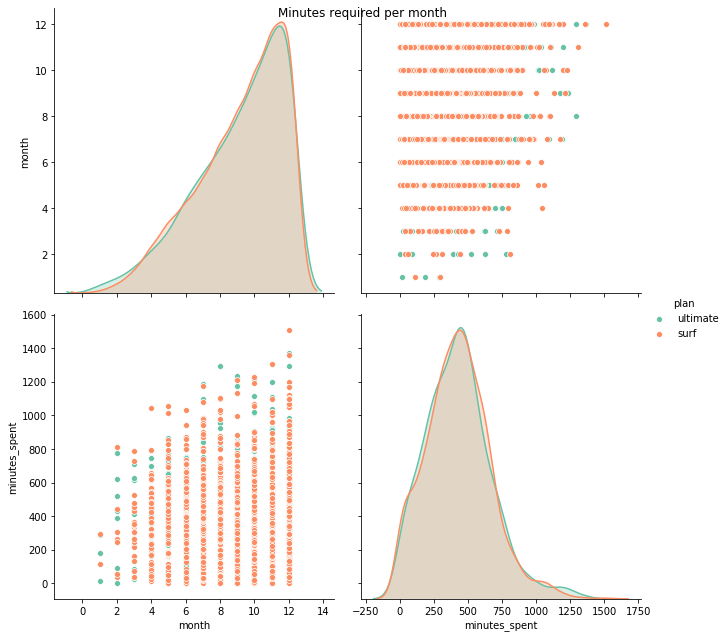

In [50]:
pp = sns.pairplot(full_pivot, vars=['month', 'minutes_spent'], hue = 'plan', palette="Set2", height=4.5)
pp.fig.suptitle("Minutes required per month")
plt.show()

As we can see the most calls we have in September-December period, which is makes sence since in this period we have a lot of Holidays, so people will call to to friends or relatives. According that we also can see that clients spend more minutes in this period. Clients who use surf plan, which is cheaper, most off all exceed the limits and pay extra money. Users of Ultimate lan seems like have enough minutes per month for their needs.

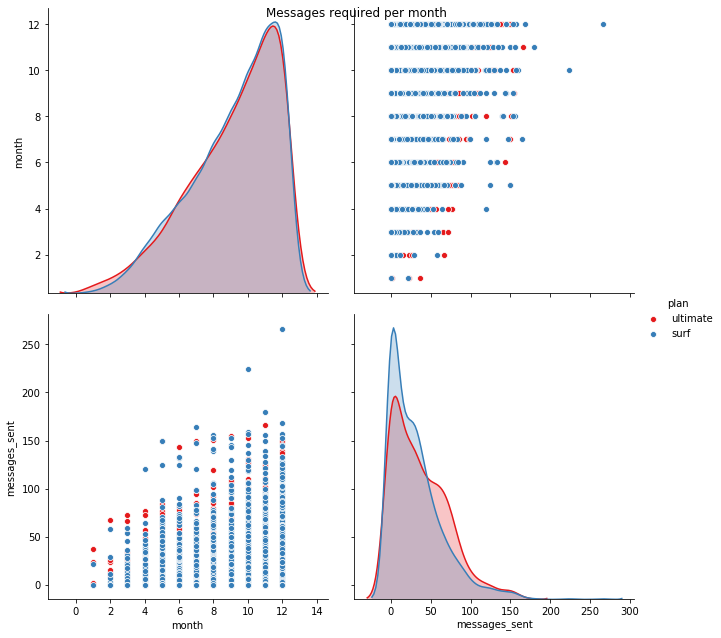

In [51]:
pp = sns.pairplot(full_pivot, vars=['month', 'messages_sent'], hue = 'plan', palette="Set1", height=4.5)
pp.fig.suptitle("Messages required per month")
plt.show()

For messages we see the same picture. Most messages users send on holidays period, and again seems like for surf users the amount of messages is not enough.

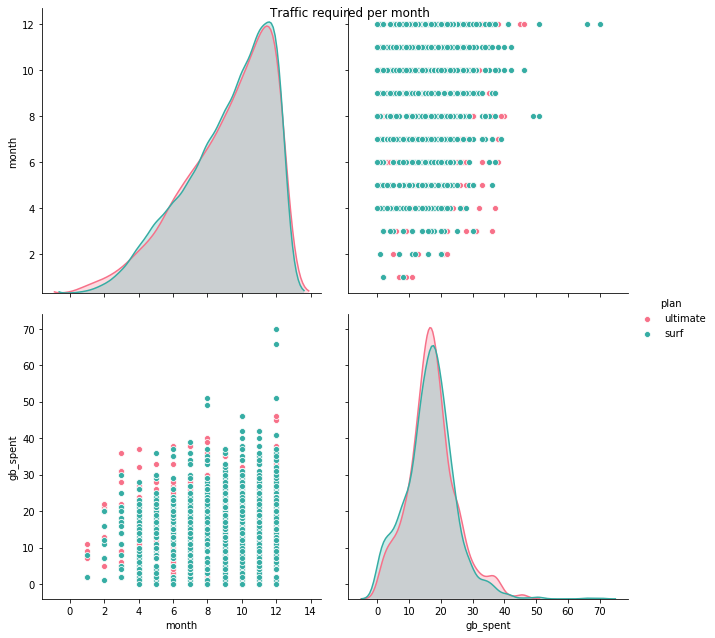

In [52]:
pp = sns.pairplot(full_pivot, vars=['month', 'gb_spent'], hue = 'plan', palette="husl", height=4.5)
pp.fig.suptitle("Traffic required per month")
plt.show()

We see that the most of users spend near 20 Gb of traffic per month, and again surf users exceeded their limits and needed to pay extra.

### Calculating mean, standart deviation and dispersion 


First of all need to separate the users with different plans

In [53]:
surf_us = full_pivot.query('plan == "surf"')
surf_us.head()

,user_id,month,calls_made,minutes_spent,messages_sent,mb_spent,gb_spent,city,plan,total_fee
1,1001,8,27.0,182.0,30.0,6929.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
2,1001,9,49.0,315.0,44.0,13333.0,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
3,1001,10,65.0,393.0,53.0,22356.0,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,90.09
4,1001,11,64.0,426.0,36.0,18524.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.00
5,1001,12,56.0,412.0,44.0,19398.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.00


In [54]:
ultimate_us = full_pivot.query('plan == "ultimate"')
ultimate_us.head()

,user_id,month,calls_made,minutes_spent,messages_sent,mb_spent,gb_spent,city,plan,total_fee
0,1000,12,16.0,124.0,11.0,1903.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70.0
19,1006,11,2.0,10.0,15.0,2072.0,3.0,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70.0
20,1006,12,9.0,59.0,139.0,32144.0,32.0,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,84.0
26,1008,10,71.0,476.0,21.0,17131.0,17.0,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70.0
27,1008,11,63.0,446.0,37.0,23706.0,24.0,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70.0


#### Calls

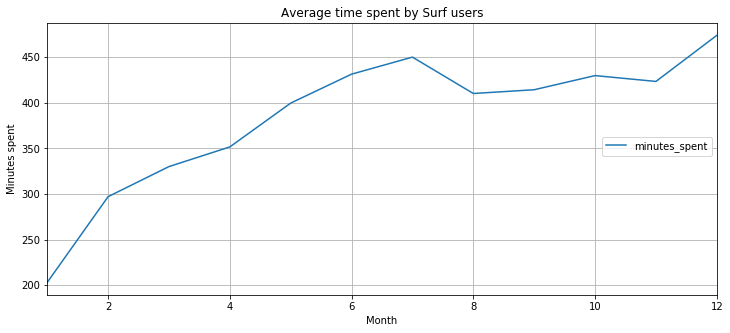

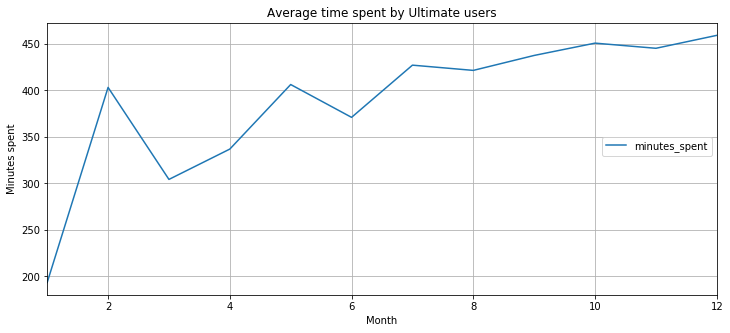

In [55]:
(surf_us 
          .pivot_table(index='month', values='minutes_spent', aggfunc='mean')
          .plot(grid=True, figsize=(12, 5))
)
plt.xlabel("Month")
plt.ylabel("Minutes spent")
plt.legend(bbox_to_anchor=(1, 0.6))
plt.title("Average time spent by Surf users")
plt.show()
(ultimate_us 
          .pivot_table(index='month', values='minutes_spent', aggfunc='mean')
          .plot(grid=True, figsize=(12, 5))
)
plt.xlabel("Month")
plt.ylabel("Minutes spent")
plt.legend(bbox_to_anchor=(1, 0.6))
plt.title("Average time spent by Ultimate users")
plt.show()

In [56]:
surf_calls_mean = surf_us['minutes_spent'].mean()
print('Average time spent by Surf plan users- {:.2f} minutes'.format(surf_calls_mean))
ultimate_calls_mean = ultimate_us['minutes_spent'].mean()
print('Average time spent by Ultimate plan users- {:.2f} minutes'.format(ultimate_calls_mean))

Average time spent by Surf plan users- 428.75 minutes
Average time spent by Ultimate plan users- 430.45 minutes


In [57]:
surf_calls_var = np.var(surf_us['minutes_spent'], ddof=1)
print('Dispersion of calls amount by month - {:.2f}'.format(surf_calls_var))
ultimate_calls_var = np.var(ultimate_us['minutes_spent'], ddof=1)
print('Dispersion of calls amount by month - {:.2f}'.format(ultimate_calls_var))

Dispersion of calls amount by month - 54968.28
Dispersion of calls amount by month - 57844.46


In [58]:
surf_calls_standard_deviation = np.sqrt(surf_calls_var)
print('Standart deviation of calls amount - {:.2f}'.format(surf_calls_standard_deviation))
ultimate_calls_standard_deviation = np.sqrt(ultimate_calls_var)
print('Standart deviation of calls amount - {:.2f}'.format(ultimate_calls_standard_deviation))

Standart deviation of calls amount - 234.45
Standart deviation of calls amount - 240.51


In [59]:
surf_us['minutes_spent'].describe()

count    1573.000000
mean      428.749523
std       234.453150
min         0.000000
25%       272.000000
50%       425.000000
75%       576.000000
max      1510.000000
Name: minutes_spent, dtype: float64

In [60]:
ultimate_us['minutes_spent'].describe()

count     720.000000
mean      430.450000
std       240.508762
min         0.000000
25%       260.000000
50%       424.000000
75%       565.250000
max      1369.000000
Name: minutes_spent, dtype: float64

In [61]:
print('Amount of minutes needed to satisfy 99% of clients - {:.2f}'.format(surf_calls_mean + 3 * surf_calls_standard_deviation))
print('Amount of minutes needed to satisfy 99% of clients - {:.2f}'.format(ultimate_calls_mean + 3 * ultimate_calls_standard_deviation))

Amount of minutes needed to satisfy 99% of clients - 1132.11
Amount of minutes needed to satisfy 99% of clients - 1151.98


So we can see that users of Surf plan and users of Ultimate plan spent equal minutes per month, also there is almost the same amount of minutes they need to satisfy their needs. 

#### Messages

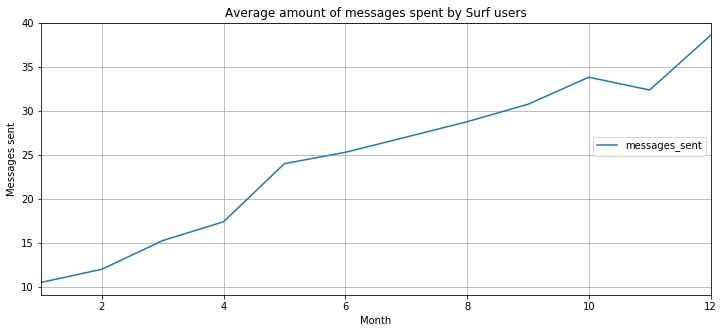

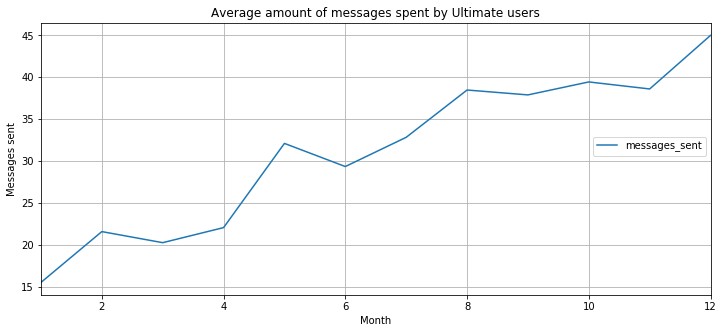

In [62]:
(surf_us 
          .pivot_table(index='month', values='messages_sent', aggfunc='mean')
          .plot(grid=True, figsize=(12, 5))
)
plt.xlabel("Month")
plt.ylabel("Messages sent")
plt.legend(bbox_to_anchor=(1, 0.6))
plt.title("Average amount of messages spent by Surf users")
plt.show()
(ultimate_us 
          .pivot_table(index='month', values='messages_sent', aggfunc='mean')
          .plot(grid=True, figsize=(12, 5))
)
plt.xlabel("Month")
plt.ylabel("Messages sent")
plt.legend(bbox_to_anchor=(1, 0.6))
plt.title("Average amount of messages spent by Ultimate users")
plt.show()

In [63]:
surf_mes_mean = surf_us['messages_sent'].mean()
print('Average messages amount spent by Surf plan users - {:.0f}' .format(surf_mes_mean))
ult_mes_mean = ultimate_us['messages_sent'].mean()
print('Average messages amount spent by Ultimate plan users - {:.0f}' .format(ult_mes_mean))

Average messages amount spent by Surf plan users - 31
Average messages amount spent by Ultimate plan users - 38


In [64]:
surf_mes_var = np.var(surf_us['messages_sent'], ddof=1)
print('Dispersion of messages amount by month for Surf plan - {:.2f}'.format(surf_mes_var))
ult_mes_var = np.var(ultimate_us['messages_sent'], ddof=1)
print('Dispersion of messages amount by month for Ultimate plan - {:.2f}'.format(ult_mes_var))

Dispersion of messages amount by month for Surf plan - 1126.72
Dispersion of messages amount by month for Ultimate plan - 1208.76


In [65]:
surf_mes_standard_deviation = np.sqrt(surf_mes_var)
print('Standart deviation of messages amount for Surf plan - {:.2f}'.format(surf_mes_standard_deviation))
ult_mes_standard_deviation = np.sqrt(ult_mes_var)
print('Standart deviation of messages amount for Ultimate plan - {:.2f}'.format(ult_mes_standard_deviation))

Standart deviation of messages amount for Surf plan - 33.57
Standart deviation of messages amount for Ultimate plan - 34.77


In [66]:
surf_us['messages_sent'].describe()

count    1573.000000
mean       31.159568
std        33.566717
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: messages_sent, dtype: float64

In [67]:
ultimate_us['messages_sent'].describe()

count    720.000000
mean      37.551389
std       34.767179
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: messages_sent, dtype: float64

In [68]:
print('Amount of messages needed to satisfy 99% of clients - {:.2f}'.format(surf_mes_mean + 3 * surf_mes_standard_deviation))
print('Amount of messages needed to satisfy 99% of clients - {:.2f}'.format(ult_mes_mean + 3 * ult_mes_standard_deviation))

Amount of messages needed to satisfy 99% of clients - 131.86
Amount of messages needed to satisfy 99% of clients - 141.85


We see that users of both plans use almost the same amount of messages per month in average

#### Internet Traffic

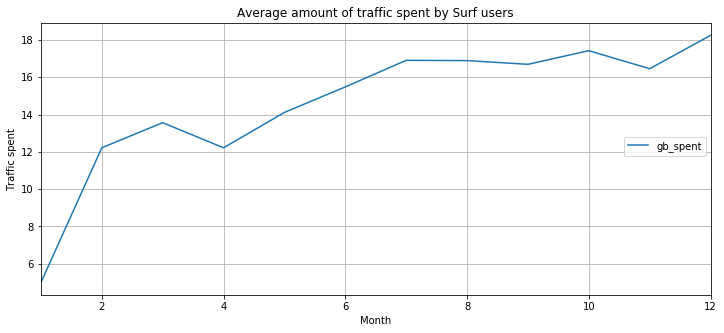

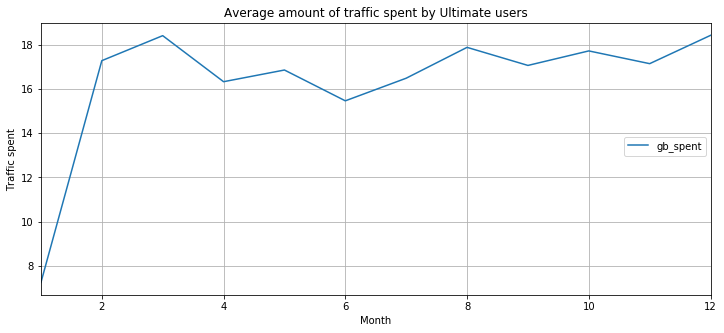

In [69]:
(surf_us 
          .pivot_table(index='month', values='gb_spent', aggfunc='mean')
          .plot(grid=True, figsize=(12, 5))
)
plt.xlabel("Month")
plt.ylabel("Traffic spent")
plt.legend(bbox_to_anchor=(1, 0.6))
plt.title("Average amount of traffic spent by Surf users")
plt.show()
(ultimate_us 
          .pivot_table(index='month', values='gb_spent', aggfunc='mean')
          .plot(grid=True, figsize=(12, 5))
)
plt.xlabel("Month")
plt.ylabel("Traffic spent")
plt.legend(bbox_to_anchor=(1, 0.6))
plt.title("Average amount of traffic spent by Ultimate users")
plt.show()

In [70]:
surf_gb_mean = surf_us['gb_spent'].mean()
print('Average traffic amount spent by Surf plan users - {:.2f}' .format(surf_gb_mean))
ult_gb_mean = ultimate_us['gb_spent'].mean()
print('Average traffic amount spent by Ultimate plan users - {:.2f}' .format(ult_gb_mean))

Average traffic amount spent by Surf plan users - 16.68
Average traffic amount spent by Ultimate plan users - 17.33


In [71]:
surf_gb_var = np.var(surf_us['gb_spent'], ddof=1)
print('Dispersion of traffic amount by month for Surf plan - {:.2f}'.format(surf_gb_var))
ult_gb_var = np.var(ultimate_us['gb_spent'], ddof=1)
print('Dispersion of traffic amount by month for Ultimate plan - {:.2f}'.format(ult_gb_var))

Dispersion of traffic amount by month for Surf plan - 61.65
Dispersion of traffic amount by month for Ultimate plan - 58.94


In [72]:
surf_gb_standard_deviation = np.sqrt(surf_gb_var)
print('Standart deviation of traffic amount for Surf plan - {:.2f}'.format(surf_gb_standard_deviation))
ult_gb_standard_deviation = np.sqrt(ult_gb_var)
print('Standart deviation of traffic amount for Ultimate plan - {:.2f}'.format(ult_gb_standard_deviation))

Standart deviation of traffic amount for Surf plan - 7.85
Standart deviation of traffic amount for Ultimate plan - 7.68


In [73]:
surf_us['gb_spent'].describe()

count    1573.000000
mean       16.684679
std         7.852067
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: gb_spent, dtype: float64

In [74]:
ultimate_us['gb_spent'].describe()

count    720.000000
mean      17.334722
std        7.677282
min        0.000000
25%       13.000000
50%       17.000000
75%       21.000000
max       46.000000
Name: gb_spent, dtype: float64

In [75]:
print('Amount of traffic needed to satisfy 99% of clients - {:.2f}'.format(surf_gb_mean + 3 * surf_gb_standard_deviation))
print('Amount of traffic needed to satisfy 99% of clients - {:.2f}'.format(ult_gb_mean + 3 * ult_gb_standard_deviation))

Amount of traffic needed to satisfy 99% of clients - 40.24
Amount of traffic needed to satisfy 99% of clients - 40.37


So after calculations we see that it seems like in average users of both plans spent almost equal traffic amount, but after we look on the deviation, standart dispersion and graphs we can see that Surf plan users start to use more traffic in the holiday period (it may be connected with shopping, they might order gifts for friends and relatives, also on those period we have a sale time: Black Friday, Cyber Monday etc), while Ultimate plan users spend traffic more evenly during the year.

# Conclusion
After calculations and visualization of our Data, we can see that for both plans we have the very same results. Users start to be more active closer to the year end and use more calls, messages and traffic. It can be connected with holidays and sales time we have in this period. Everybody wants to say greetings to their friends and relatives and make a good shopping. What is interesting is the amount of spent minutes, messages and traffic is almost equal for both plan. So I can assume for this stage that selling a Surf plan is more profitable since those users pay more extra money because they exceed their limits while Ultimate plan users almost always stay in limits.

_____
_____
_____

# Step 4. Test the hypotheses

## To do list:
Check following hypothesis:
 -  The average revenue from users of Ultimate and Surf calling plans differs.
 -  The average revenue from users in NY-NJ area is different from that of the users from other regions.

### Checking the hypothes that average revenue from users of Ultimate and Surf calling plans differs

This task is straightforward, we will take 'total_fee' columns for each plan as a series. Then use statistical methods to compare the means of two plans using scipy.stats.ttest_ind() function. Here is our hypothesis:

 -  Null hypothesis: There are no statistically differences between the average revenue form users of Ultimate and Surf calling plans.
 -  Alternative hypothesis: There are statisticaly difference between the average revenue from users of Ultimate and Surf calling plans.
 
 A significance level, also known as alpha we will take as 0.05 as the most common nowadays.

In [76]:
total_surf = surf_us['total_fee']
total_ult = ultimate_us['total_fee']
alpha = 0.05
results = st.ttest_ind(total_surf, total_ult)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis (there are statisticall differences)!")
else:
    print("We can't reject the null hypothesis (there are no statisticall differences)!")

p-value: 3.596177345135958e-08
We reject the null hypothesis (there are statisticall differences)!


In [77]:
print('Average fee coming from the "surf" plan is:', round(np.mean(total_surf)), 'USD')
print('Average fee coming from the "ultimate" plan is:', round(np.mean(total_ult)), 'USD')

Average fee coming from the "surf" plan is: 61 USD
Average fee coming from the "ultimate" plan is: 72 USD


We see that hypothese that average revenue from users of Ultimate and Surf calling plans differs is true. Average fee for Ultimate plan users is bigger than fee for Surf plan users.

### The average revenue from users in NY-NJ area is different from that of the users from other regions.

For this task, we need to find users who live in the NY-NJ regions. It is not directly indicated in the data, but we have a city column, which mentioned the city and region together. We will pull out the region from there. The rule to assign NY-NJ region is as follows: If NY and/or NJ exist in the city, then we will categorize this row as "NY-NJ", otherwise we will categorize it as "other".
-  The null hypotese is "The revenue of citizens of NY-NJ regions and of other regions are have no significantly statistical differences"
-  Alternative hypotese: There are statistical differences between average revenue of NY-NJ citizens and citizens of other regions.
-  Alpha is 0.05

In [78]:
def region(city):
    target = ['NY', 'NJ']
    region = city.split(',')[1].split()[0].split('-')
    for i in region:
        if i in target:
            return 'NY-NJ'
        
print(region(full_pivot['city'][457]))


NY-NJ


In [79]:
full_pivot['region'] = full_pivot['city'].apply(region)
full_pivot.sample(5)

,user_id,month,calls_made,minutes_spent,messages_sent,mb_spent,gb_spent,city,plan,total_fee,region
700,1147,6,98.0,641.0,23.0,34920.0,35.0,"Urban Honolulu, HI MSA",surf,224.23,None
1216,1257,9,66.0,590.0,34.0,5078.0,5.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,22.70,NY-NJ
1289,1273,10,39.0,237.0,44.0,10737.0,11.0,"Baton Rouge, LA MSA",ultimate,70.00,None
1452,1316,11,34.0,259.0,66.0,20191.0,20.0,"Tulsa, OK MSA",surf,70.48,None
25,1007,12,87.0,617.0,50.0,29096.0,29.0,"Grand Rapids-Kentwood, MI MSA",surf,163.51,None


In [80]:
full_pivot.region.fillna('other', inplace=True)
full_pivot['region'].value_counts()

other    1805
NY-NJ     488
Name: region, dtype: int64

In [81]:
total_nynj = full_pivot[full_pivot['region'] == 'NY-NJ']['total_fee']
total_other = full_pivot[full_pivot['region'] == 'other']['total_fee']
alpha = 0.05
results = st.ttest_ind(total_nynj, total_other)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis. \
That means, average revenues from NY-NJ and other regions have statistically differences!")
else:
    print("We can't reject the null hypothesis.\That means,average revenues from NY-NJ and other regions have not statistically significantly differences!")

p-value: 0.10987688433462241
We can't reject the null hypothesis.\That means,average revenues from NY-NJ and other regions have not statistically significantly differences!


In [82]:
print('Average revenue coming from user who lives in NY-NJ regions is equal to:', round(np.mean(total_nynj)),'USD')
print('Average revenue coming from user who lives in other regions is equal to:', round(np.mean(total_other)),'USD')

Average revenue coming from user who lives in NY-NJ regions is equal to: 61 USD
Average revenue coming from user who lives in other regions is equal to: 65 USD


As we see fees of users who lives in NY-NJ regions are not significantly differs from thos who lives in other regions.

# Conclusion
We checked 2 hypotheses. First one we checked hypothese that revenue from those who use "Surf" plan differs than revenue from those who use "Ultimate". I took that revenues are equal for 2 plans as a null hypothese. The alternative was that revenues are different. After calculations I got the result which showed that alternative hypothese is True and revenue for both plans is defferent. 
Second one was hypothese that NY-NJ citizens bring different revenue than citizens of other regions. And again for null hypothese I took the hypothese that they are almost equal, and that they are different for the alternative hypothese. As we can see the null hypothese is True. And average revenue from NY-NJ citizens is almost equal with revenue from citizens from other regions.

____
____
_____

# Step5. Overall conclusion.

  We had a 5 datasets. Almost all of them were in good condition. Titles are good and seems like not corrupted too much. But few things was needed to do. First of all I converted date columns to datetime type of data. Second thing was to check calls with 0 min duration and 0 mn traffic usage. Third, was needed to check the age of customers, if we don't have anomalies there. Forth, check if we need to replace missing values in churn_date column, or it is reasonable to leave it as it is. And last thing I saw that all of datasets could be merged and connected one with other.
  During prepearing the data to further calculations I converted all date columns to datetime format, also I saw a lot of values with 0 for calls and traffic used. I didn't remove those data or replace it since it could affect all further calculations. Maybe it were missing calls, or calls for 1-2 seconds or a technical error. Same with traffic, it might be people who don't use mobile internet or the technical error. Same with messages, nowadays messangers more popular than standart sms, so I can assume that some people don't use sms at all. I would ask data engineers to take a deeper look on it and check once more. In the column where we have the date of stop using tariff plan I also had a lot of missing data, but according to description it heppend because clients still continue to use their plans. Because we have a data for 2018 year, I replaced those values with the last day of Decemeber, 2018. 
All data was grouped in a new dataset, which will allow me to make calculations more easy. Also I calculated the using of plan limits and now I have a picture of who exceeded the limit and who didn't.
  After calculations and visualization of our Data, we can see that for both plans we have the very same results. Users start to be more active closer to the year end and use more calls, messages and traffic. It can be connected with holidays and sales time we have in this period. Everybody wants to say greetings to their friends and relatives and make a good shopping. What is interesting is the amount of spent minutes, messages and traffic is almost equal for both plan. So I can assume for this stage that selling a Surf plan is more profitable since those users pay more extra money because they exceed their limits while Ultimate plan users almost always stay in limits.
  My theory was proved by checking hypotheses. We can see that revenue for "Surf" and "Ultimate" time is different. On the first look it seems like "Ultimate" plan may bring more revenue but if we look deeper we can see that amount of "Surf" users in twice bigger than people who use "Ultimate" plan and in average "Surf" users exceed the limit plan and pay 42 USD extra while "Ultimate" users pay in average only 2 USD extra.
  After checking hypothese that NY-NJ citizens pay the same fee as citizens of other regions we can see that is true and difference is not significant. But amount of users who live in NY-NJ region in 4 times smaller than amount of users from other region. So I can assume that in those regions people use mobile services more frequently that in people from other regions and have more income which allows them to pay more fees. 
  I would suggest to expand marketing company for the "Surf" plan since we can see that it brings more profit. People think that low monthly fee allows them to economy their money, but in long term we can see that they pay extra and in average bring income almost equal for the "Ultimate" plan monthly fee.